In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
pd.read_csv('DiamondPricesData.csv')
df=pd.read_csv('DiamondPricesData.csv')
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [7]:
df.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [8]:
df.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [9]:
df['depth'].fillna(value=df['depth'].mean(),inplace=True)


In [10]:
df['color'].fillna(value=df['color'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.drop_duplicates()
df=df.drop_duplicates()
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [13]:
cont=df.select_dtypes(exclude='object')
cont

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [14]:
cat=df.select_dtypes(include='object')
cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


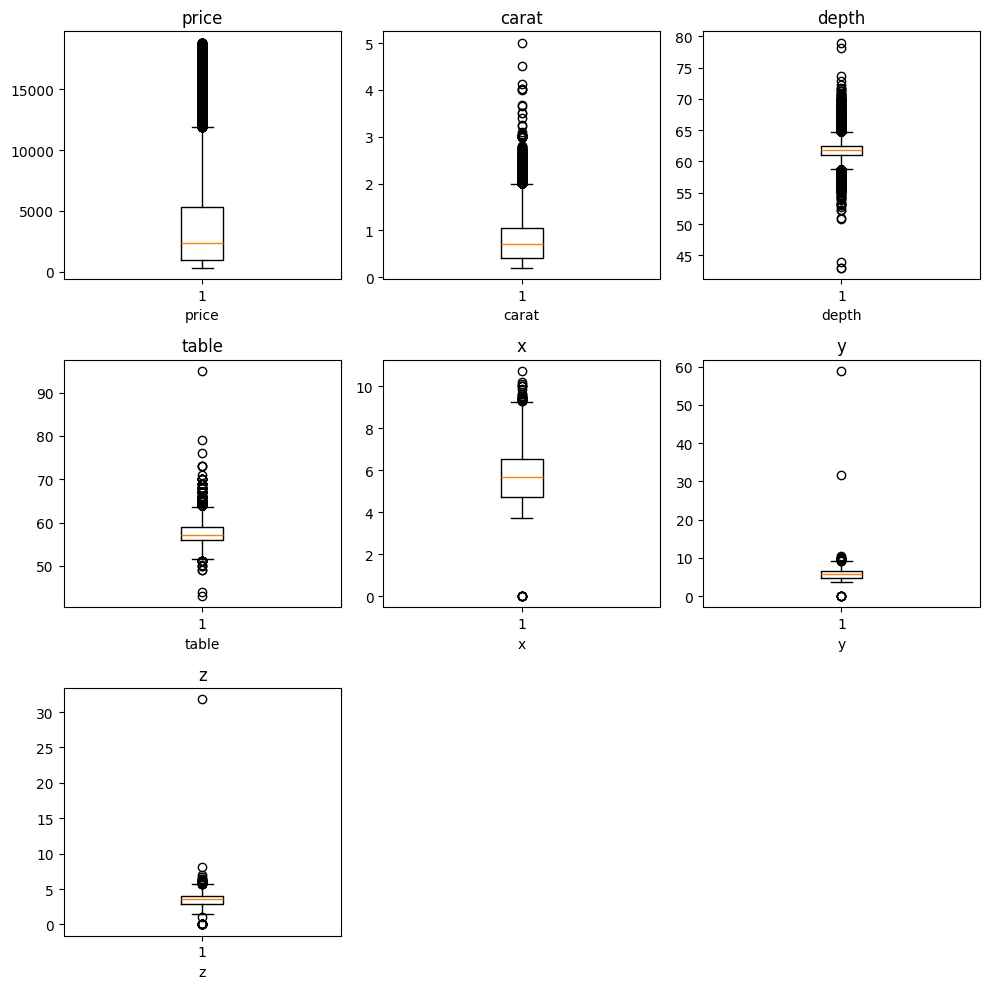

In [15]:
plt.figure(figsize=(10,10))
for i,col in enumerate(cont):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout()
plt.show()    

In [16]:
def remove_outliers(columns):
    for column in columns:
        q1=df[column].quantile(.25)
        q3=df[column].quantile(.75)
        IQR=q3-q1
        upper_bound=q3+1.5*IQR
        lower_bound=q1-1.5*IQR
        df[column]=np.where(df[column]>upper_bound,upper_bound,df[column])
        df[column]=np.where(df[column]<lower_bound,lower_bound,df[column])

In [17]:
remove_outliers(['price'	,'carat'	,'depth'	,'table'	,'x'	,'y'	,'z'])

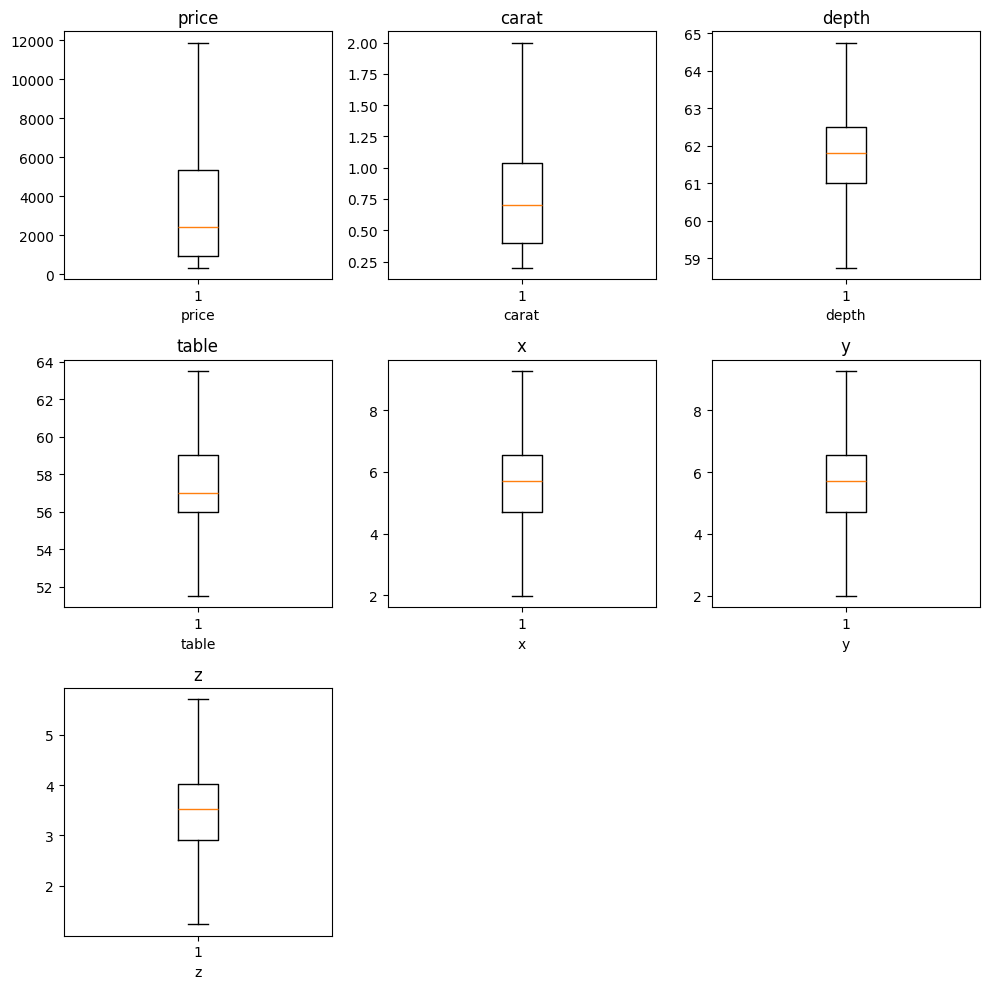

In [18]:
plt.figure(figsize=(10,10))
for i,col in enumerate(cont):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout()
plt.show()    

machine learning

In [19]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [20]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [22]:
df["clarity"].replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], [0, 1, 2,3,4,5,6,7], inplace=True)

In [23]:
df['cut'].replace(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],[0,1,2,3,4], inplace=True)

In [24]:
df['color'].replace(['E', 'I', 'J', 'H', 'F', 'D', 'G'],[0,1,2,3,4,5,6],inplace=True)

In [25]:
cont

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [26]:
corr_matrix=df.corr()
corr_matrix

,price,carat,cut,color,clarity,depth,table,x,y,z
price,1.000000,0.936545,0.054485,0.000696,-0.145875,-0.009093,0.136167,0.911937,0.913459,0.905015
carat,0.936545,1.000000,0.114856,-0.047684,-0.286552,0.021544,0.186775,0.981959,0.981231,0.977588
cut,0.054485,0.114856,1.000000,-0.033459,-0.117969,0.171115,0.380239,0.104394,0.107627,0.126666
color,0.000696,-0.047684,-0.033459,1.000000,0.063973,-0.000227,-0.039284,-0.040473,-0.040689,-0.040432
clarity,-0.145875,-0.286552,-0.117969,0.063973,1.000000,-0.034125,-0.135653,-0.306193,-0.303727,-0.305479
depth,-0.009093,0.021544,0.171115,-0.000227,-0.034125,1.000000,-0.299816,-0.029062,-0.031762,0.089786
table,0.136167,0.186775,0.380239,-0.039284,-0.135653,-0.299816,1.000000,0.197725,0.191757,0.157434
x,0.911937,0.981959,0.104394,-0.040473,-0.306193,-0.029062,0.197725,1.000000,0.998357,0.988258
y,0.913459,0.981231,0.107627,-0.040689,-0.303727,-0.031762,0.191757,0.998357,1.000000,0.987882
z,0.905015,0.977588,0.126666,-0.040432,-0.305479,0.089786,0.157434,0.988258,0.987882,1.000000


In [27]:
X=df[['carat','x','y','z']]
X

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


In [28]:
y=df['price']
y

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53794, dtype: float64

In [29]:

from sklearn.model_selection import train_test_split



In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

In [35]:
print(f"r^2 score: {r2:.2f}")
print(f" mean squared error:{mse:.3f}")
print(f" root mean squared error:{rmse:.3f}")

r^2 score: 0.88
 mean squared error:1370702.496
 root mean squared error:1170.770


In [36]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r^2 score: {r2:.2f}")
print(f" mean squared error:{mse:.3f}")
print(f" root mean squared error:{rmse:.3f}")

r^2 score: 0.80
 mean squared error:2224699.890
 root mean squared error:1491.543


In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r^2 score: {r2:.2f}")
print(f" mean squared error:{mse:.3f}")
print(f" root mean squared error:{rmse:.3f}")

r^2 score: 0.89
 mean squared error:1253810.206
 root mean squared error:1119.737


In [38]:
# Get feature importance
importances = model.feature_importances_
feature_names = df.columns  # Assuming X_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, importances))

# Print feature importance
print("Feature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

Feature Importance:
price: 0.7164
cut: 0.2233
color: 0.0305
carat: 0.0298


In [39]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


In [40]:
joblib.dump(model,'linear_model.pkl')
print('model saved as linear_model.pkl')

model saved as linear_model.pkl


In [41]:
# Load the model
loaded_model = joblib.load('linear_model.pkl')

# Make predictions
new_data = X_test[:100]  # Example new data
predictions = loaded_model.predict(new_data)
print("Predictions on new data:", predictions)

Predictions on new data: [ 1991.649       3776.1475      1831.28183333  1700.44166667
  7719.1175       572.70333333   831.65333333  2633.19
   918.45        4986.4255      2615.215       4989.75
  5242.19375     1513.9425      6825.60125    11829.78875
  3816.71       10031.619375    3921.35         614.73083333
  4628.78        6378.24166667  5278.93533333  3931.75333333
   816.99819048  6619.58083333   876.10655556  6190.10535714
 10520.055       2912.33        8995.855       3987.27333333
   805.12190476   694.33         840.32         573.05
  4808.38583333  2047.69083333  3034.65761905  6312.2475
   928.9035      1657.44916667   926.00041667  3103.959
  6186.95714286  5322.62        2387.35        1331.274
   423.76        2679.22039394   825.82814286  2102.38
   686.26916667   719.35666667   898.907       5719.87125
  2297.29883333 11625.49375     1593.56866667  5617.016
  6768.7075      4473.06866667 11160.4125      1164.82
  5292.92083333  2274.225       9693.90875      858.19

In [42]:
# Load the model
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions
new_data = X_test[:50]  # Example new data
predictions = loaded_model.predict(new_data)
print("Predictions on new data:", predictions)

Predictions on new data: [ 1991.649       3776.1475      1831.28183333  1700.44166667
  7719.1175       572.70333333   831.65333333  2633.19
   918.45        4986.4255      2615.215       4989.75
  5242.19375     1513.9425      6825.60125    11829.78875
  3816.71       10031.619375    3921.35         614.73083333
  4628.78        6378.24166667  5278.93533333  3931.75333333
   816.99819048  6619.58083333   876.10655556  6190.10535714
 10520.055       2912.33        8995.855       3987.27333333
   805.12190476   694.33         840.32         573.05
  4808.38583333  2047.69083333  3034.65761905  6312.2475
   928.9035      1657.44916667   926.00041667  3103.959
  6186.95714286  5322.62        2387.35        1331.274
   423.76        2679.22039394]
